 Dataset created successfully!
   Student_ID                Event_Name Department  Rating (1–5)  \
0         101               Workshop AI         EE             3   
1         102             Cultural Fest         ME             1   
2         103  Entrepreneurship Seminar        ECE             2   
3         104             TechFest 2025        CSE             1   
4         105             Cultural Fest        CSE             4   

            Liked_Features Improvement_Areas            Comments  
0        Networking, Music       More events  Needs improvement.  
1       Music, Food Stalls              None  Needs improvement.  
2       Games, Food Stalls     Better timing  Needs improvement.  
3         Games, Workshops      Better sound  Needs improvement.  
4  Food Stalls, Management              None   Great experience!  

--- Missing Values ---
Student_ID           0
Event_Name           0
Department           0
Rating (1–5)         0
Liked_Features       0
Improvement_Areas  

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16552\2074608407.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Event_Name", y="Rating (1–5)", data=df, estimator="mean", palette="viridis")


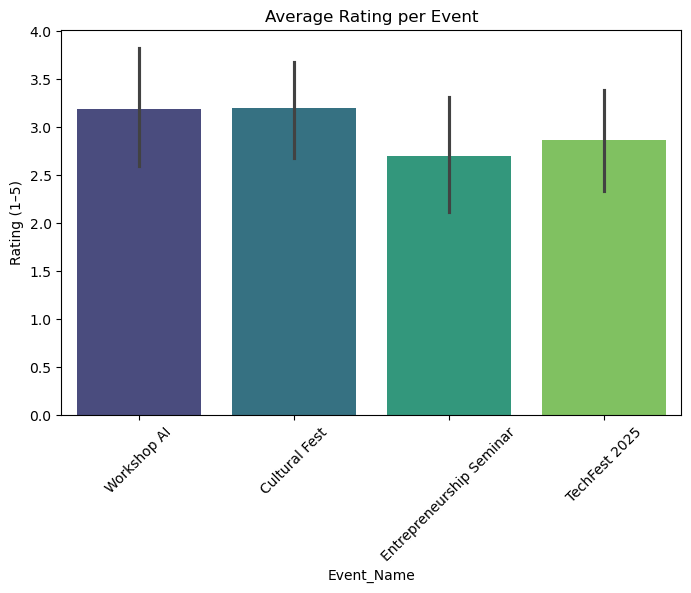

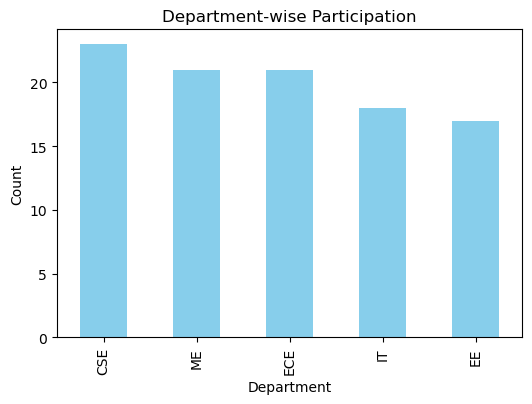

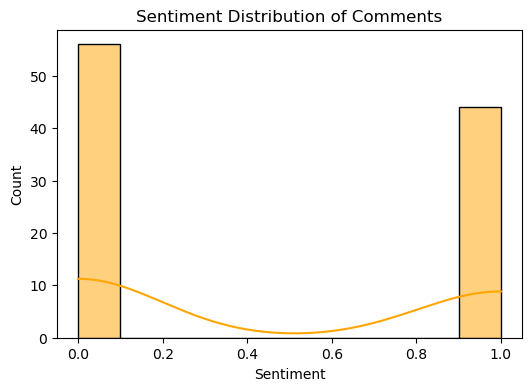


📊 Final Insights:
- Best rated event: Cultural Fest with avg rating 3.19
- Most active department: CSE with 23 participants
- Most liked feature: Management


In [1]:
# -------------------------------
# 1. Import Required Libraries
# -------------------------------
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# -------------------------------
# 2. Create  Dataset
# -------------------------------

# Sample values
students = list(range(101, 201))   # 100 students
events = ["TechFest 2025", "Workshop AI", "Cultural Fest", "Entrepreneurship Seminar"]
departments = ["CSE", "ECE", "IT", "ME", "EE"]
liked_features = ["Workshops", "Music", "Speakers", "Food Stalls", "Management", "Games", "Stalls", "Networking"]
improvements = ["More seating", "Better timing", "Better sound", "More events", "None"]

# Generate  data
data = []
for student in students:
    event = random.choice(events)
    dept = random.choice(departments)
    rating = random.randint(1, 5)
    liked = random.sample(liked_features, k=2)  # pick 2 liked features
    improve = random.choice(improvements)
    comment = "Great experience!" if rating >= 4 else "Needs improvement."

    data.append([student, event, dept, rating, ", ".join(liked), improve, comment])

# Create DataFrame
df = pd.DataFrame(data, columns=["Student_ID", "Event_Name", "Department", "Rating (1–5)",
                                 "Liked_Features", "Improvement_Areas", "Comments"])

# Save dataset
df.to_csv("college_event_feedback.csv", index=False)
print(" Dataset created successfully!")
print(df.head())

# -------------------------------
# 3. Data Cleaning
# -------------------------------
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# -------------------------------
# 4. Descriptive Analysis
# -------------------------------

# Average rating per event
avg_rating = df.groupby("Event_Name")["Rating (1–5)"].mean()
print("\n--- Average Rating per Event ---\n", avg_rating)

# Department-wise participation
dept_count = df["Department"].value_counts()
print("\n--- Department Participation ---\n", dept_count)

# Most liked features
all_features = df["Liked_Features"].str.split(", ").explode()
top_features = all_features.value_counts().head(5)
print("\n--- Top Liked Features ---\n", top_features)

# -------------------------------
# 5. Sentiment Analysis on Comments
# -------------------------------
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df["Sentiment"] = df["Comments"].apply(get_sentiment)

print("\n--- Sample Sentiments ---")
print(df[["Comments", "Sentiment"]].head())

# -------------------------------
# 6. Visualization
# -------------------------------

# Average Rating per Event
plt.figure(figsize=(8,5))
sns.barplot(x="Event_Name", y="Rating (1–5)", data=df, estimator="mean", palette="viridis")
plt.title("Average Rating per Event")
plt.xticks(rotation=45)
plt.show()

# Department Participation
plt.figure(figsize=(6,4))
df["Department"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Department-wise Participation")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Sentiment"], bins=10, kde=True, color="orange")
plt.title("Sentiment Distribution of Comments")
plt.show()

# -------------------------------
# 7. Insights
# -------------------------------
print("\n📊 Final Insights:")
print(f"- Best rated event: {avg_rating.idxmax()} with avg rating {avg_rating.max():.2f}")
print(f"- Most active department: {dept_count.idxmax()} with {dept_count.max()} participants")
print(f"- Most liked feature: {top_features.idxmax()}")
